# Analysis of Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
# Importing the Dataset
df = pd.read_csv('advertising.csv').rename(columns= {"Unnamed: 0":"index"}).set_index("index")
df.head()

,TV,Radio,Newspaper,Sales
index,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
print("Description of the numerical values:")
display(df.describe())
print("Checking for Null Values:")
display(df.isnull().any())
print("Checking the Data Types")
df.dtypes

Description of the numerical values:


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Checking for Null Values:


TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

Checking the Data Types


TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# Visualize the Data Using Plots

C:\Users\yihao\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yihao\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yihao\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yihao\Anaconda3\lib\si

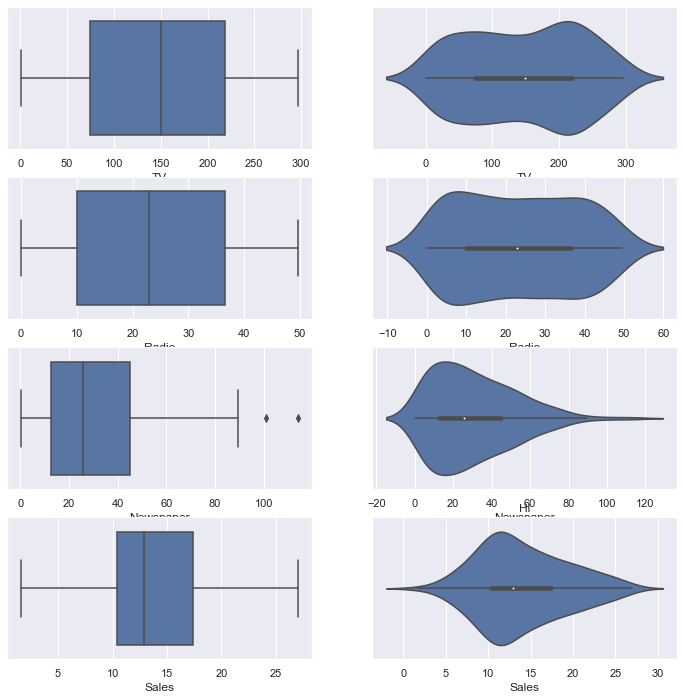

In [11]:
# Using Box Plots and Violinplot

f, axes = plt.subplots(4,2, figsize = (12,12))
count = 0
for i in df:
    sb.boxplot(df[i], orient='h',ax=axes[count, 0])
    sb.violinplot(df[i], ax=axes[count, 1])
    count+=1

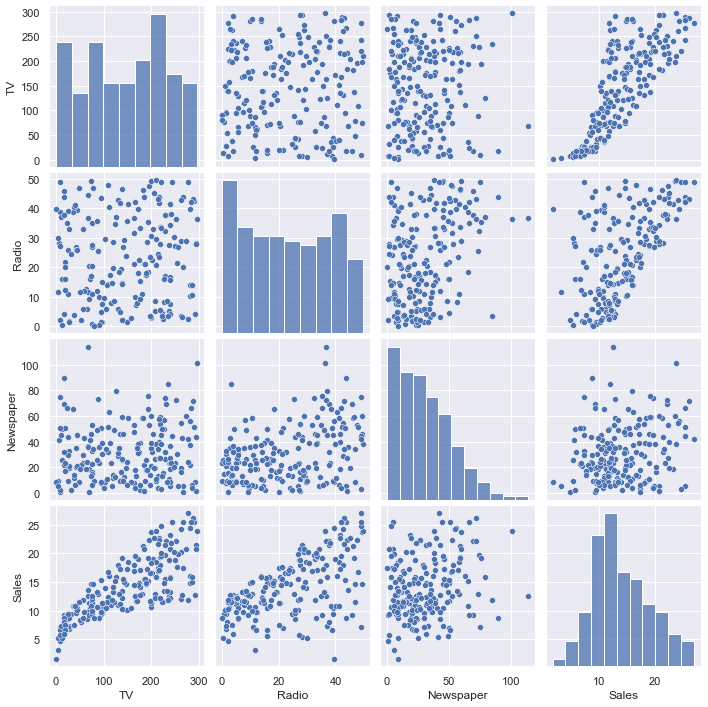

In [9]:
sb.pairplot(df)

<AxesSubplot:title={'center':'Heat Map Showing Correlation of Features'}>

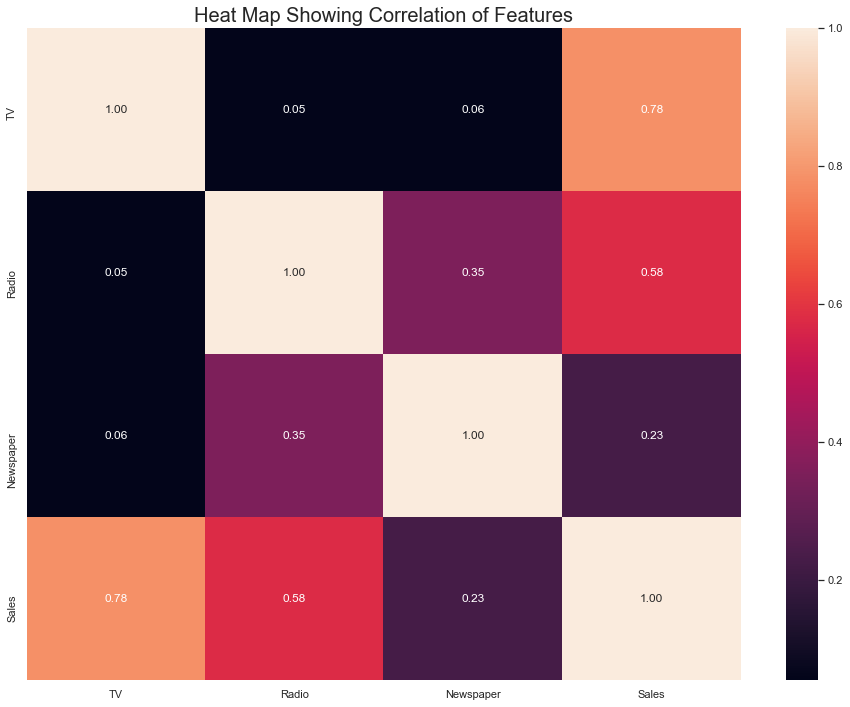

In [23]:
f, axes = plt.subplots(figsize = (16,12))
axes.set_title("Heat Map Showing Correlation of Features", fontsize = 20)
sb.heatmap(df.corr(), annot= True, fmt = '0.2f')

Text(0.5, 1.05, 'Correlation between Sales and TV')

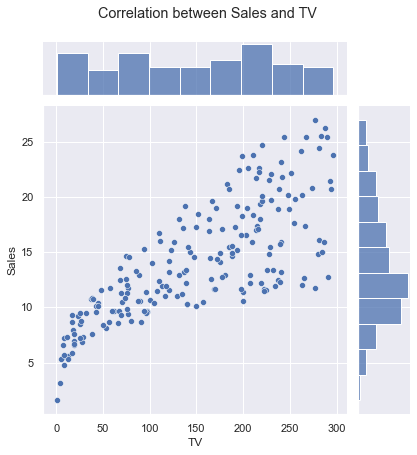

In [38]:
f = sb.jointplot(data=df, x = "TV", y="Sales")
f.fig.suptitle("Correlation between Sales and TV", y = 1.05)


# Simple Linear Regression

Now that we have plotted out our features, let us attempt to make a prediction of the sale price using a simple linear regression model. We will first attempt a Uni-Variate Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

linreg = LinearRegression()

In [43]:
print("The length of our dataset is:", df.shape[0])

The length of our dataset is: 200


In [48]:
# Using only TV Advertising for our Sales (Due to the highest correlation)
y = df[['Sales']]
X = df[['TV']]


In [88]:
# We will now split the dataset to be trained and tested/validated

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
print("The train dataset has {} rows".format(len(X_train)))
print("The test dataset has {} rows".format(len(X_test)))

The train dataset has 150 rows
The test dataset has 50 rows


We will now fit the Uni Variate Linear Regresion Model

In [89]:
linreg.fit(X_train, y_train)
print("The Coefficient is {:.5f} and the Intercept is {:.5f}".format(linreg.coef_[0][0],linreg.intercept_[0]))

The Coefficient is 0.04638 and the Intercept is 7.19561


In [90]:
y_pred = linreg.predict(X_test)

In [91]:
print("The Explained Variance R^2 for Train data is:",linreg.score(X_train , y_train))
print("The Explained Variance R^2 for Test data is:",linreg.score(X_test , y_test))

The Explained Variance R^2 for Train data is: 0.5813532918544498
The Explained Variance R^2 for Test data is: 0.6859288272493231


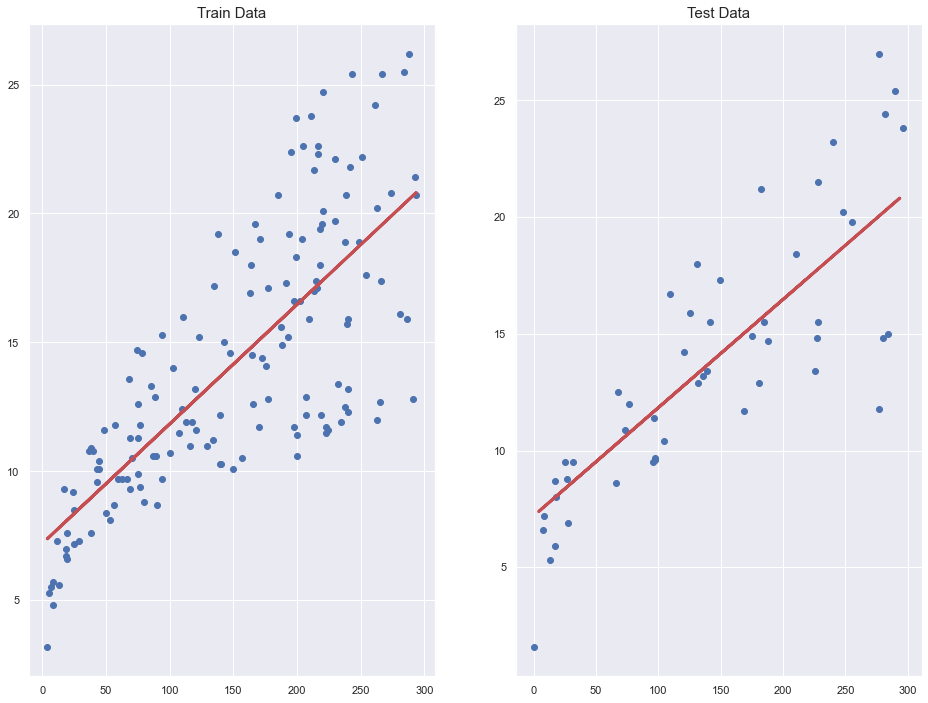

In [124]:
f,axes = plt.subplots(1,2, figsize=(16,12))
axes[0].set_title("Train Data", fontsize = 15)
axes[1].set_title("Test Data", fontsize = 15)
axes[0].scatter(X_train, y_train, marker='o')
axes[0].plot(X_train, X_train*linreg.coef_[0][0] + linreg.intercept_[0], color='r', linewidth = 3)
axes[1].scatter(X_test, y_test, marker = 'o')
axes[1].plot(X_train, X_train*linreg.coef_[0][0] + linreg.intercept_[0], color='r', linewidth = 3)

# Multi-Variate Linear Regression

We will now attempt to include all the features

In [143]:
display(df.columns)

y = df[['Sales']]
X = df[['TV','Radio','Newspaper']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70)
print("The train dataset has {} rows and {} features".format(len(X_train), X_train.shape[1]))
print("The test dataset has {} rows".format(len(X_test)))

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

The train dataset has 140 rows and 3 features
The test dataset has 60 rows


In [144]:
linreg.fit(X_train, y_train)
print("The Coefficient is",linreg.coef_[0]," and the Intercept is {:.5f}".format(linreg.intercept_[0]))

The Coefficient is [ 0.04687605  0.18561721 -0.00302306]  and the Intercept is 2.97105


In [146]:
y_pred = linreg.predict(X_test)


In [147]:
print("The Explained Variance R^2 for Train data is:",linreg.score(X_train , y_train))
print("The Explained Variance R^2 for Test data is:",linreg.score(X_test , y_test))

The Explained Variance R^2 for Train data is: 0.9007301016950605
The Explained Variance R^2 for Test data is: 0.8823898332129699


As we can see, the score goes up significantly upon including more features relevant to predictingg the Sales Price

# Analysis of Features

I will now attempt to analyze the features according to their correlation with each other and their skewness. I hope to be able to apply Normalizing of the values

In [148]:
df.kurtosis()

TV          -1.226495
Radio       -1.260401
Newspaper    0.649502
Sales       -0.408869
dtype: float64

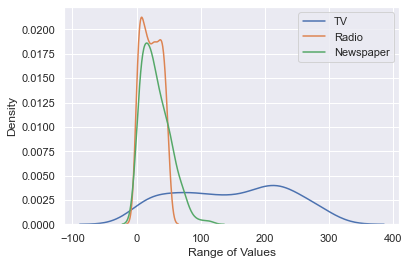

In [163]:
# sb.kdeplot(df['Sales'], label='Sale Price')
sb.kdeplot(df['TV'], label= "TV")
sb.kdeplot(df['Radio'], label = "Radio")
sb.kdeplot(df["Newspaper"], label="Newspaper")
plt.xlabel('Range of Values')
plt.legend()

In [183]:
# We will analyse the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif


,Features,VIF Factor
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

In [190]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test , y_pred)

2.4287789886407287

In [205]:
msetrain = []
msetest = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    msetrain.append(mean_squared_error(y_test, y_pred))
    msetest.append(mean_squared_error(y_train, linreg.predict(X_train)))

Below Code, we observe the mean square error for the train and test data over 100 iterations

C:\Users\yihao\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Train Data MSE'}>

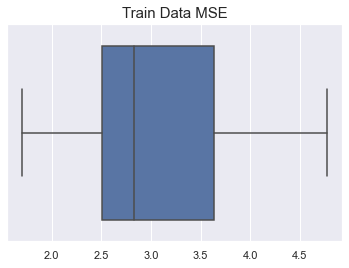

In [211]:
plt.title("Train Data MSE", fontsize= 15)
sb.boxplot(msetrain)


C:\Users\yihao\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Test Data MSE'}>

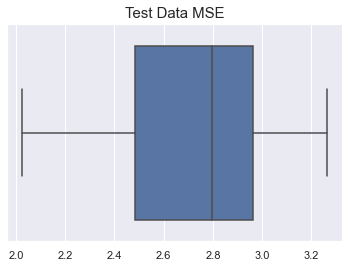

In [212]:
plt.title("Test Data MSE", fontsize = 15)
sb.boxplot(msetest)

# Conclusion

While TV had the highest correlation the Sale Price, it is insufficient in predicting the SalePrice. We have to include the other features such as Radio and Newspaper. This allowed me to achieve a higher explained variance score of 0.88 - 0.90. Additionally the size of the dataset is too small with only 200 entries. Id like to perform greater analysis and even normalizing the values